# Trabajo Práctico 3 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [48]:
# Import libraries

import cv2
from PIL import Image
from skimage.util import random_noise
import numpy as np
from matplotlib import pyplot as plt

## Ejercicio 1

Convolución de una imagen con un kernel cuadrado uniforme. La secuencia de tamaños de kernel es:

$$1\quad 3\quad 5\quad 9\quad 15\quad 25\quad 35\quad 45\quad 55$$

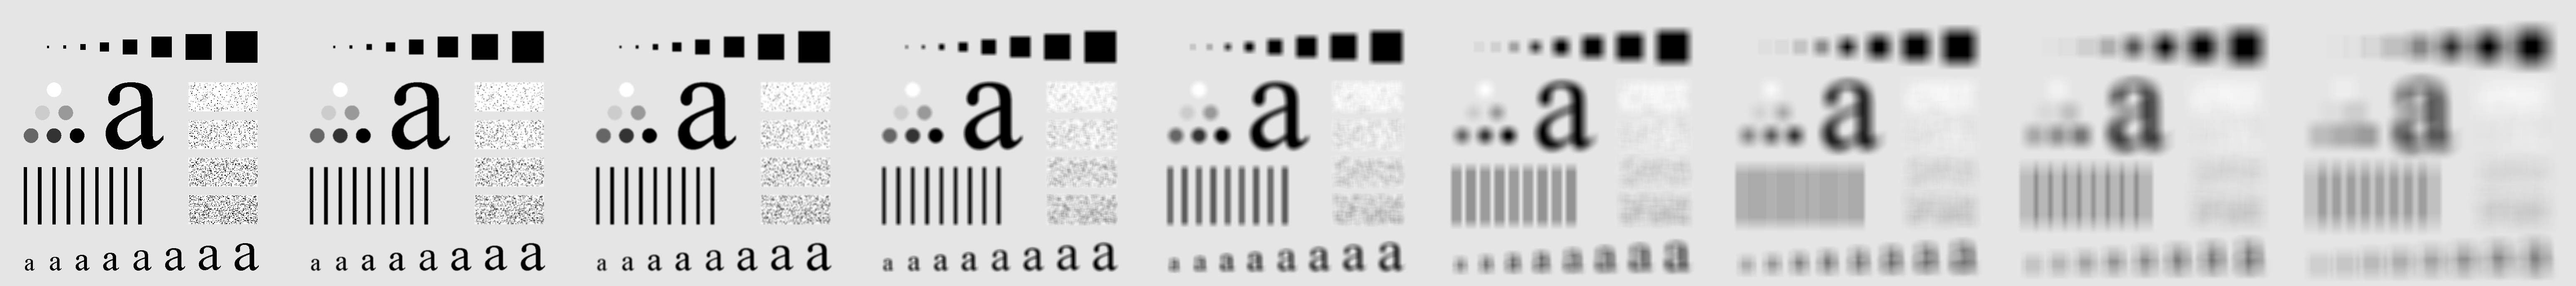

In [9]:
img = cv2.imread('images/characters_test_pattern.tif')

img_combined = np.copy(img)

for n in [3,5,9,15,25,35,45,55]:
    kernel = np.ones((n,n),np.float32) / n**2
    img_lp = cv2.filter2D(img,-1,kernel)

    img_combined = np.concatenate((img_combined, img_lp), axis=1)

display(Image.fromarray(img_combined))

## Ejercicio 2

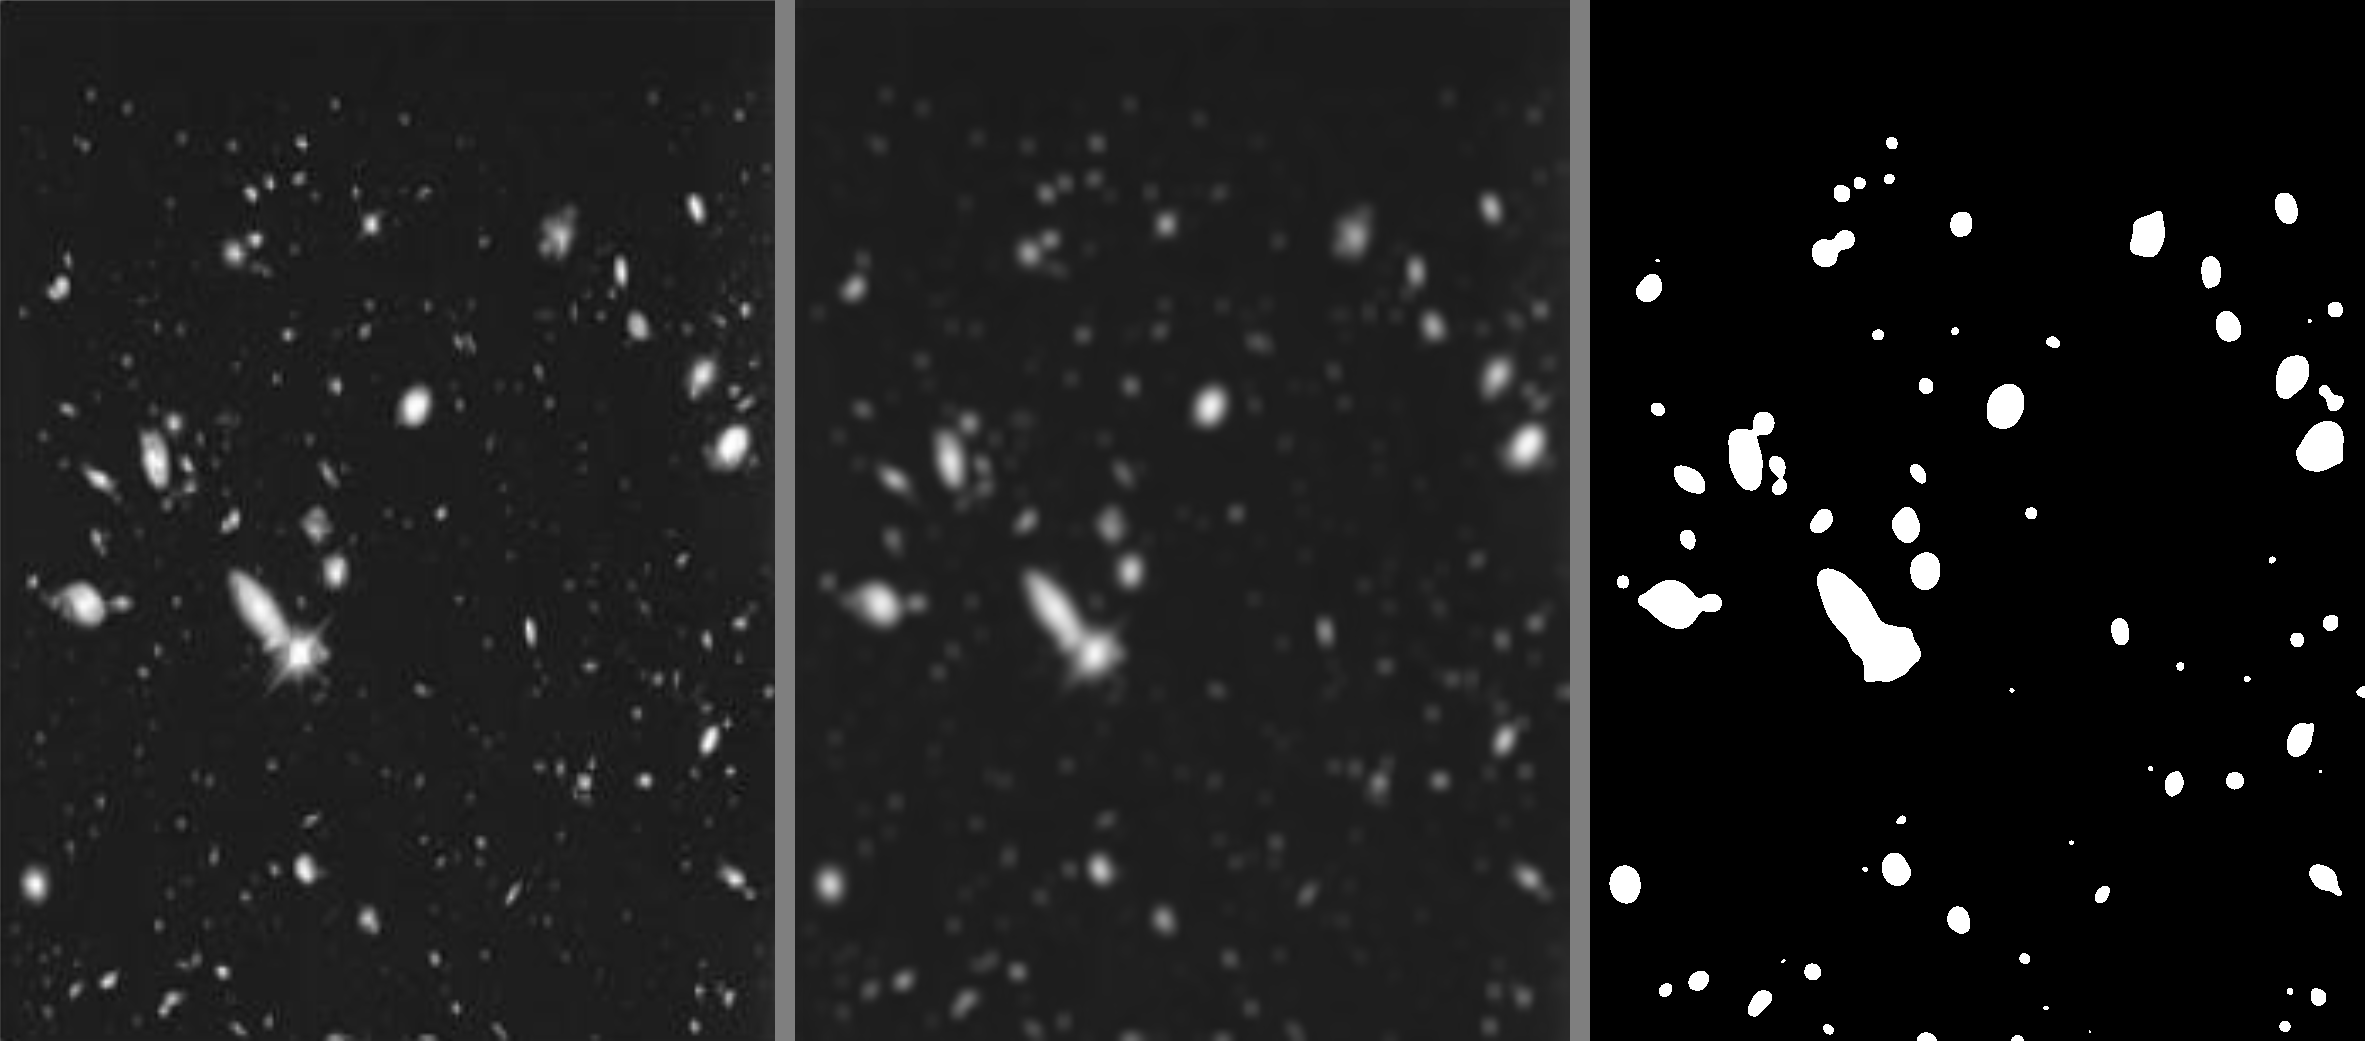

In [47]:
img = cv2.imread('images/stars.png')

n = 15
kernel = np.ones((n,n),np.float32) / n**2
img_lp = cv2.filter2D(img,-1,kernel)
ret, img_thresh = cv2.threshold(img_lp, int(0.25*256), 255, cv2.THRESH_BINARY)

spacer = np.ones((img.shape[0], 20, 3), dtype=np.uint8)*127
img_combined = np.concatenate((img, spacer, img_lp, spacer, img_thresh), axis=1)
display(Image.fromarray(img_combined))

## Ejercicio 3

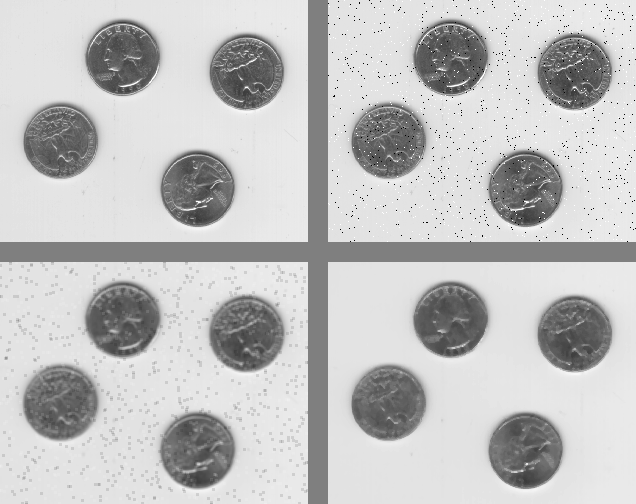

In [74]:
img = cv2.imread('images/eight.tif', cv2.IMREAD_GRAYSCALE)

img_snp = random_noise(img, mode='s&p', amount=0.02)*255
img_snp = img_snp.astype(np.uint8)

n = 3
kernel = np.ones((n,n),np.float32) / n**2
img_lp = cv2.filter2D(img_snp,-1,kernel)
img_median = cv2.medianBlur(img_snp, 3)

spacer_h = np.ones((img.shape[0], 20), dtype=np.uint8)*127
img_combined_1 = np.concatenate((img, spacer_h, img_snp), axis=1)
img_combined_2 = np.concatenate((img_lp, spacer_h, img_median), axis=1)
spacer_v = np.ones((20, img_combined_1.shape[1]), dtype=np.uint8)*127
img_combined = np.concatenate((img_combined_1, spacer_v, img_combined_2), axis=0)
display(Image.fromarray(img_combined))